In [1]:
import ml_models
import data_pipeline2 as dp 
import numpy as np
from training_models import train_model

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch
import torch.optim as optim


os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
#df_answers = pd.read_csv('results/model_answers.csv', index_col = None)
df_results = pd.read_csv('results/model_results.csv', index_col = None)
#df_recursive = pd.read_csv('results/model_recursive.csv', index_col = None)
df_pinns = pd.read_csv('results/pinn_results.csv', index_col = None)

#df_singlevar = pd.read_csv('results/model_singlevar.csv', index_col = None)

#df_answers = df_answers[df_answers.columns[1:]]

In [5]:
master_df = pd.concat([df_results, df_pinns], ignore_index = True)#,df_singlevar], ignore_index = True)
master_df = master_df[master_df.columns[1:]]
master_df

,model,input_size,output_size,loss,r2,predictions
0,Baseline,5,1,0.258061,0.736714,"[[1.0996633768081665], [1.1225848197937012], [..."
1,Baseline,5,5,0.258780,0.725409,"[[1.0943284034729004, 1.0908955335617065, 1.09..."
2,Baseline,5,10,0.264274,0.707092,"[[1.0818965435028076, 1.08206307888031, 1.0844..."
3,Baseline,5,20,0.280811,0.665681,"[[1.0738946199417114, 1.0732184648513794, 1.07..."
4,Baseline,5,40,0.313093,0.584765,"[[1.0540786981582642, 1.0586038827896118, 1.04..."
...,...,...,...,...,...,...
151,MLP_pinn2,40,40,0.292731,0.600972,"[[1.3164047002792358, 1.2943309545516968, 1.28..."
152,MLP_pinn1,5,40,0.313001,0.584972,"[[1.1164014339447021, 1.1147148609161377, 1.10..."
153,MLP_pinn1,10,40,0.298493,0.603660,"[[1.2386488914489746, 1.248056173324585, 1.246..."
154,MLP_pinn1,20,40,0.298292,0.601905,"[[1.195078730583191, 1.1901843547821045, 1.172..."


In [6]:
df_results.sort_values('loss')

,Unnamed: 0,model,input_size,output_size,loss,r2,predictions
55,15,CNN,40,1,0.233342,0.759365,"[[1.2662733793258667], [1.2862677574157715], [..."
115,15,MLP,40,1,0.233380,0.759242,"[[1.2438879013061523], [1.3153573274612427], [..."
50,10,CNN,20,1,0.234032,0.760510,"[[1.2121258974075317], [1.2229198217391968], [..."
110,10,MLP,20,1,0.234108,0.760434,"[[1.1928585767745972], [1.218156099319458], [1..."
15,15,Baseline,40,1,0.234704,0.757964,"[[1.415594220161438], [1.3919991254806519], [1..."
...,...,...,...,...,...,...,...
44,4,CNN,5,40,0.312536,0.585559,"[[1.0885467529296875, 1.102683186531067, 1.102..."
104,4,MLP,5,40,0.313059,0.584932,"[[1.1277376413345337, 1.1274986267089844, 1.12..."
4,4,Baseline,5,40,0.313093,0.584765,"[[1.0540786981582642, 1.0586038827896118, 1.04..."
64,4,LSTM,5,40,0.313530,0.584354,"[[0.9959389567375183, 0.974773108959198, 1.018..."


In [7]:
df_results

,Unnamed: 0,model,input_size,output_size,loss,r2,predictions
0,0,Baseline,5,1,0.258061,0.736714,"[[1.0996633768081665], [1.1225848197937012], [..."
1,1,Baseline,5,5,0.258780,0.725409,"[[1.0943284034729004, 1.0908955335617065, 1.09..."
2,2,Baseline,5,10,0.264274,0.707092,"[[1.0818965435028076, 1.08206307888031, 1.0844..."
3,3,Baseline,5,20,0.280811,0.665681,"[[1.0738946199417114, 1.0732184648513794, 1.07..."
4,4,Baseline,5,40,0.313093,0.584765,"[[1.0540786981582642, 1.0586038827896118, 1.04..."
...,...,...,...,...,...,...,...
115,15,MLP,40,1,0.233380,0.759242,"[[1.2438879013061523], [1.3153573274612427], [..."
116,16,MLP,40,5,0.235131,0.747991,"[[1.2880439758300781, 1.260267734527588, 1.277..."
117,17,MLP,40,10,0.240874,0.729334,"[[1.269455075263977, 1.2888513803482056, 1.301..."
118,18,MLP,40,20,0.257552,0.686724,"[[1.2717398405075073, 1.2799221277236938, 1.27..."


In [10]:
master_df = master_df[master_df['output_size']==40]
master_df = master_df[master_df['model']!='Baseline']
master_df = master_df[master_df['model']!='GCN']
master_df = master_df[master_df['model']!='GRU']


master_df.sort_values(['model','input_size'])

,model,input_size,output_size,loss,r2,predictions
44,CNN,5,40,0.312536,0.585559,"[[1.0885467529296875, 1.102683186531067, 1.102..."
49,CNN,10,40,0.298521,0.603809,"[[1.2183184623718262, 1.2208880186080933, 1.24..."
54,CNN,20,40,0.297306,0.603398,"[[1.1989718675613403, 1.2113302946090698, 1.16..."
59,CNN,40,40,0.293722,0.598541,"[[1.2632794380187988, 1.2734109163284302, 1.29..."
140,CNN_pinn1,5,40,0.313040,0.584936,"[[1.0975261926651, 1.1032869815826416, 1.09824..."
141,CNN_pinn1,10,40,0.298386,0.603792,"[[1.2385258674621582, 1.2396191358566284, 1.23..."
142,CNN_pinn1,20,40,0.296402,0.604117,"[[1.191406011581421, 1.178750991821289, 1.1689..."
143,CNN_pinn1,40,40,0.294046,0.599268,"[[1.2920551300048828, 1.2892072200775146, 1.30..."
136,CNN_pinn2,5,40,0.312748,0.585286,"[[1.0925840139389038, 1.1020007133483887, 1.09..."
137,CNN_pinn2,10,40,0.298265,0.603934,"[[1.2265534400939941, 1.2354787588119507, 1.23..."


In [30]:
import ast

# Convert string representations of lists to actual lists
master_df['predictions'] = master_df['predictions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract the last prediction (list) from each row
master_df['last_predictions'] = master_df['predictions'].apply(lambda x: x[-1] if isinstance(x, list) else None)

# Display the new DataFrame with the last predictions
print(master_df[['model', 'input_size', 'last_predictions']])


          model  input_size                                   last_predictions
44          CNN           5  [-0.22770962119102478, -0.2236131727695465, -0...
49          CNN          10  [-0.1618400514125824, -0.17554835975170135, -0...
54          CNN          20  [-0.03751305863261223, -0.032452672719955444, ...
59          CNN          40  [0.0026293769478797913, 0.017852529883384705, ...
64         LSTM           5  [-0.22517122328281403, -0.21300792694091797, -...
69         LSTM          10  [-0.15679319202899933, -0.16722312569618225, -...
74         LSTM          20  [-0.05289776623249054, -0.07059307396411896, -...
79         LSTM          40  [-0.1404649317264557, -0.1695297360420227, -0....
104         MLP           5  [-0.22101572155952454, -0.23444047570228577, -...
109         MLP          10  [-0.146732360124588, -0.13202106952667236, -0....
114         MLP          20  [-0.09395560622215271, -0.10235001146793365, -...
119         MLP          40  [-0.1806865632534027, 0

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 12 and the vector passed to `x` has length 40.

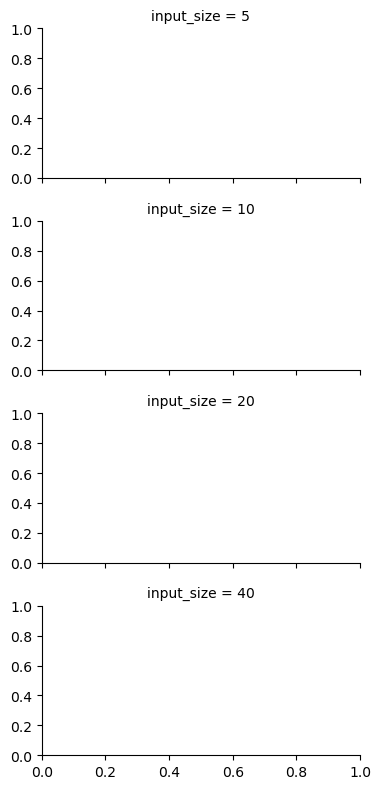

In [33]:
import matplotlib.pyplot as plt
# Create separate plots for each `input_size`

g = sns.FacetGrid(master_df, row ="input_size", sharey=True, height = 2, aspect = 2)  # Different plot per `input_size`
g.map_dataframe(sns.lineplot, x=np.arange(0,40), y="last_predictions", alpha = 0.7)


# Adjust aesthetics
g.set_axis_labels("Prediction timestep", "MSE (log)")
g.set_titles("Input Size: {row_name}")
g.add_legend()

plt.show()

['red', 'green', 'blue']
{'CNN', 'MLP', 'LSTM'}


C:\Users\livb\AppData\Local\Temp\ipykernel_28424\2274026960.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("Dark2", len(grouped3['model'].unique()))  # Use a color map


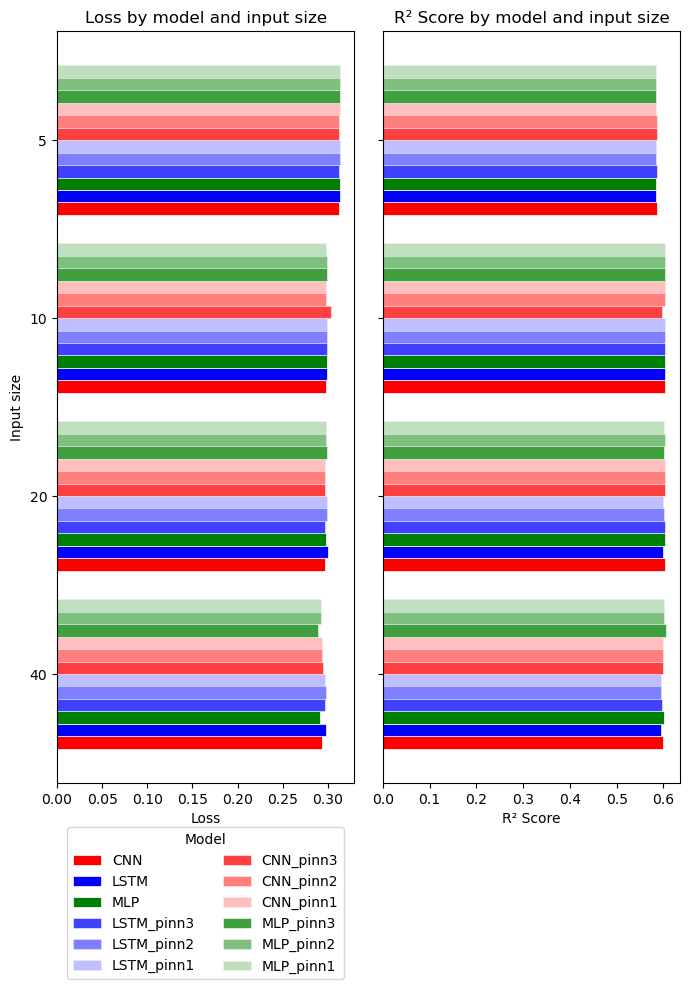

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from collections import defaultdict

# Create a list of unique input sizes
input_sizes = grouped3['input_size'].unique()[::-1]

# Define the position for each group of bars
bar_height = 0.07  # Bar height
index = np.arange(len(input_sizes))  # Y positions for the groups of bars

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,10), sharey=True)

# Get a color map
colors = cm.get_cmap("Dark2", len(grouped3['model'].unique()))  # Use a color map

# Create a mapping from model prefix to color
prefix_to_color = {}
unique_prefixes = set([model.split('_')[0] for model in grouped3['model']])  # Extract prefixes
color_list = ['red','green','blue']  # Generate colors for each prefix

print(color_list)
print(unique_prefixes)

# Assign each prefix a color
for i, prefix in enumerate(unique_prefixes):
    prefix_to_color[prefix] = color_list[i]

# Iterate over each input size group and plot the bars for both loss and R2 score
for i, input_size in enumerate(input_sizes):
    group = grouped3[grouped3['input_size'] == input_size]
    
    # Plot for loss (on ax1)
    for j, (model, loss) in enumerate(zip(group['model'], group['loss'])):
        # Check if model ends with '_recursive' to adjust opacity
            # Check model suffix and adjust alpha accordingly
        if model.endswith('_pinn1'):
            alpha = 0.25
        elif model.endswith('_pinn2'):
            alpha = 0.5
        elif model.endswith('_pinn3'):
            alpha = 0.75
        else:
            alpha = 1.0
        
        # Extract the prefix of the model name to get the assigned color
        prefix = model.split('_')[0]
        color = prefix_to_color[prefix]
        
        ax1.barh(index[i] + j * bar_height, loss, height=bar_height, 
                 label=model if i == 0 else "", color=color, 
                 edgecolor='white', linewidth=0.5, alpha=alpha)

    # Plot for R² score (on ax2)
    for j, (model, r2) in enumerate(zip(group['model'], group['r2'])):
        # Check if model ends with '_recursive' to adjust opacity
        if model.endswith('_pinn1'):
            alpha = 0.25
        elif model.endswith('_pinn2'):
            alpha = 0.5
        elif model.endswith('_pinn3'):
            alpha = 0.75
        else:
            alpha = 1.0
        
        # Extract the prefix of the model name to get the assigned color
        prefix = model.split('_')[0]
        color = prefix_to_color[prefix]
        
        ax2.barh(index[i] + j * bar_height, r2, height=bar_height, 
                 label=model if i == 0 else "", color=color, 
                 edgecolor='white', linewidth=0.5, alpha=alpha)

# Set the y-axis labels for both plots
ax1.set_yticks(index + bar_height * (len(grouped3['model'].unique()) / 2 - 0.5))
ax1.set_yticklabels(input_sizes)
ax1.set_ylabel('Input size')

# Set the x-axis labels and titles
ax1.set_xlabel('Loss')
ax1.set_title('Loss by model and input size')

ax2.set_xlabel('R² Score')
ax2.set_title('R² Score by model and input size')

# Show the legend once, below the "Model" label in ax1
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title="Model", bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2)

plt.subplots_adjust(wspace=0.0)

# Tight layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


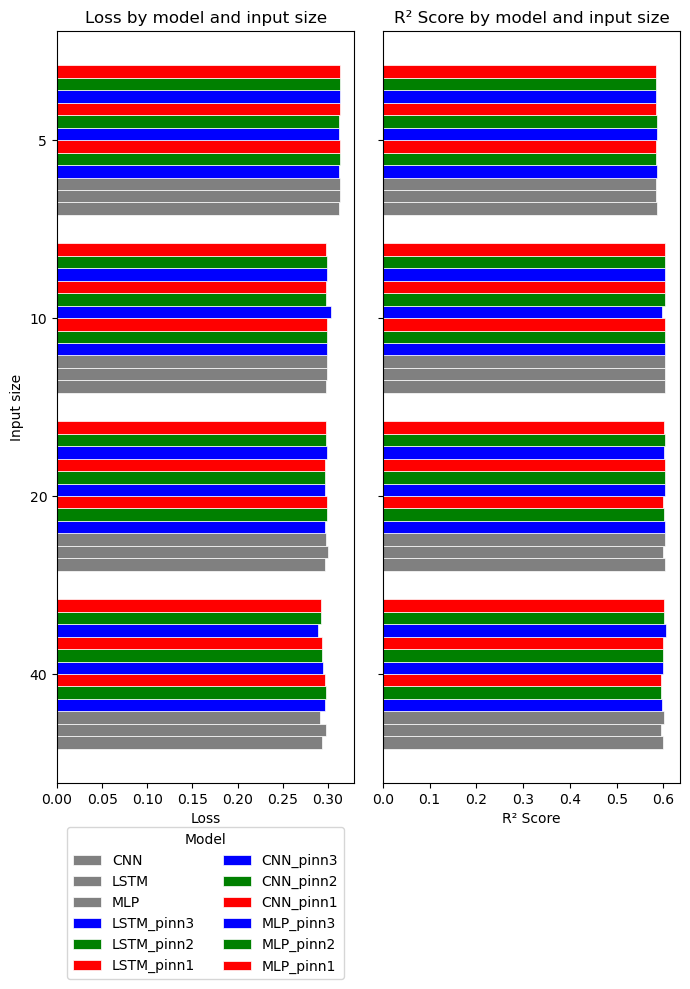

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from collections import defaultdict

# Create a list of unique input sizes
input_sizes = grouped3['input_size'].unique()[::-1]

# Define the position for each group of bars
bar_height = 0.07  # Bar height
index = np.arange(len(input_sizes))  # Y positions for the groups of bars

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,10), sharey=True)

# Define the colors for the suffix (_pinn1, _pinn2, _pinn3)
suffix_to_color = {
    '_pinn1': 'red',   # Assign red to _pinn1
    '_pinn2': 'green', # Assign green to _pinn2
    '_pinn3': 'blue',  # Assign blue to _pinn3
    'default': 'gray'  # Default color if no suffix is matched
}

# Define alpha values for the model type (prefix)
model_to_alpha = {
    'cnn': 0.25,   # CNN models get alpha 0.25
    'mlp': 0.5,    # MLP models get alpha 0.5
    'gcn': 0.75,   # GCN models get alpha 0.75
    'default': 1.0 # Default models get alpha 1.0
}

# Iterate over each input size group and plot the bars for both loss and R2 score
for i, input_size in enumerate(input_sizes):
    group = grouped3[grouped3['input_size'] == input_size]
    
    # Plot for loss (on ax1)
    for j, (model, loss) in enumerate(zip(group['model'], group['loss'])):
        # Check model suffix and assign color accordingly
        if '_pinn1' in model:
            color = suffix_to_color['_pinn1']
        elif '_pinn2' in model:
            color = suffix_to_color['_pinn2']
        elif '_pinn3' in model:
            color = suffix_to_color['_pinn3']
        else:
            color = suffix_to_color['default']
        
        # Check model prefix and assign alpha accordingly
        prefix = model.split('_')[0]
        alpha = model_to_alpha.get(prefix, model_to_alpha['default'])
        
        ax1.barh(index[i] + j * bar_height, loss, height=bar_height, 
                 label=model if i == 0 else "", color=color, 
                 edgecolor='white', linewidth=0.5, alpha=alpha)

    # Plot for R² score (on ax2)
    for j, (model, r2) in enumerate(zip(group['model'], group['r2'])):
        # Check model suffix and assign color accordingly
        if '_pinn1' in model:
            color = suffix_to_color['_pinn1']
        elif '_pinn2' in model:
            color = suffix_to_color['_pinn2']
        elif '_pinn3' in model:
            color = suffix_to_color['_pinn3']
        else:
            color = suffix_to_color['default']
        
        # Check model prefix and assign alpha accordingly
        prefix = model.split('_')[0]
        alpha = model_to_alpha.get(prefix, model_to_alpha['default'])
        
        ax2.barh(index[i] + j * bar_height, r2, height=bar_height, 
                 label=model if i == 0 else "", color=color, 
                 edgecolor='white', linewidth=0.5, alpha=alpha)

# Set the y-axis labels for both plots
ax1.set_yticks(index + bar_height * (len(grouped3['model'].unique()) / 2 - 0.5))
ax1.set_yticklabels(input_sizes)
ax1.set_ylabel('Input size')

# Set the x-axis labels and titles
ax1.set_xlabel('Loss')
ax1.set_title('Loss by model and input size')

ax2.set_xlabel('R² Score')
ax2.set_title('R² Score by model and input size')

# Show the legend once, below the "Model" label in ax1
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title="Model", bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2)

plt.subplots_adjust(wspace=0.0)

# Tight layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\livb\AppData\Local\Temp\ipykernel_28424\2403849953.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab20", len(grouped3['model'].unique()))  # Use tab20 colormap


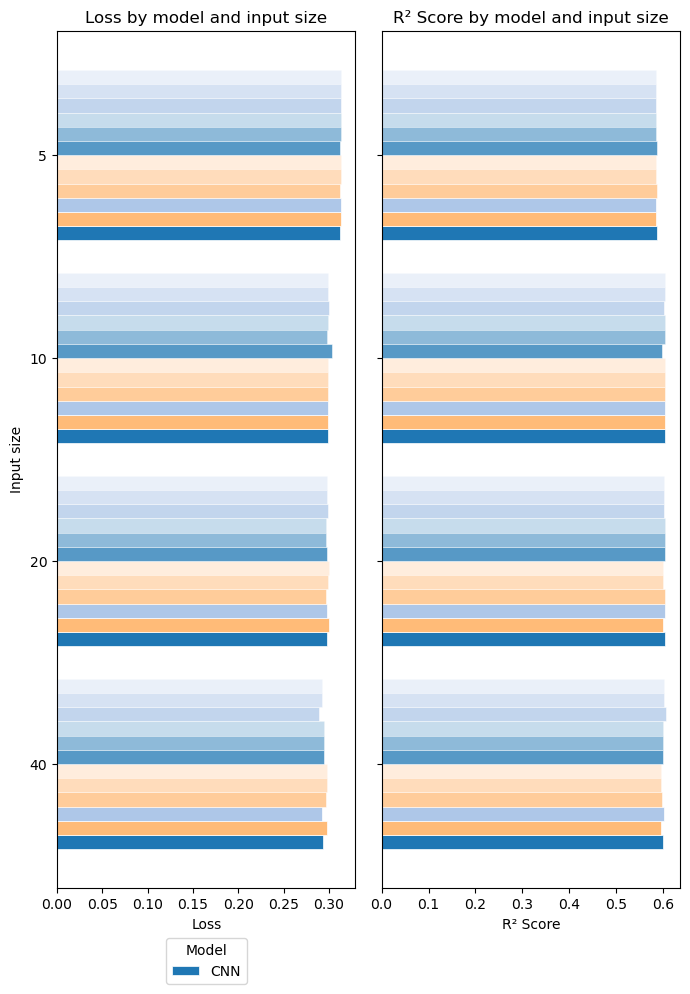

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from collections import defaultdict

# Create a list of unique input sizes
input_sizes = grouped3['input_size'].unique()[::-1]

# Define the position for each group of bars
bar_height = 0.07  # Bar height
index = np.arange(len(input_sizes))  # Y positions for the groups of bars

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,10), sharey=True)

# Get a distinct colormap (tab20 provides 20 different colors)
colors = cm.get_cmap("tab20", len(grouped3['model'].unique()))  # Use tab20 colormap

# Create a mapping from model prefix to color
prefix_to_color = {}
unique_prefixes = set([model[:3] for model in grouped3['model']])  # Extract the first 3 characters of each model
color_list = [colors(i) for i in range(len(unique_prefixes))]  # Generate colors for each prefix

# Assign each prefix a color
for i, prefix in enumerate(unique_prefixes):
    prefix_to_color[prefix] = color_list[i]

# Iterate over each input size group and plot the bars for both loss and R2 score
for i, input_size in enumerate(input_sizes):
    group = grouped3[grouped3['input_size'] == input_size]
    
    # Plot for loss (on ax1)
    for j, (model, loss) in enumerate(zip(group['model'], group['loss'])):
        # Check model suffix and adjust alpha accordingly
        if model.endswith('_pinn1'):
            alpha = 0.25
        elif model.endswith('_pinn2'):
            alpha = 0.5
        elif model.endswith('_pinn3'):
            alpha = 0.75
        else:
            alpha = 1.0
        
        # Get the prefix (first 3 characters) of the model name to get the assigned color
        prefix = model[:3]
        color = prefix_to_color[prefix]
        
        # Only label the first model for each input size
        ax1.barh(index[i] + j * bar_height, loss, height=bar_height, 
                 label=model if i == 0 and j == 0 else "", color=color, 
                 edgecolor='white', linewidth=0.5, alpha=alpha)

    # Plot for R² score (on ax2)
    for j, (model, r2) in enumerate(zip(group['model'], group['r2'])):
        # Check model suffix and adjust alpha accordingly
        if model.endswith('_pinn1'):
            alpha = 0.25
        elif model.endswith('_pinn2'):
            alpha = 0.5
        elif model.endswith('_pinn3'):
            alpha = 0.75
        else:
            alpha = 1.0
        
        # Get the prefix (first 3 characters) of the model name to get the assigned color
        prefix = model[:3]
        color = prefix_to_color[prefix]
        
        # Only label the first model for each input size
        ax2.barh(index[i] + j * bar_height, r2, height=bar_height, 
                 label=model if i == 0 and j == 0 else "", color=color, 
                 edgecolor='white', linewidth=0.5, alpha=alpha)

# Set the y-axis labels for both plots
ax1.set_yticks(index + bar_height * (len(grouped3['model'].unique()) / 2 - 0.5))
ax1.set_yticklabels(input_sizes)
ax1.set_ylabel('Input size')

# Set the x-axis labels and titles
ax1.set_xlabel('Loss')
ax1.set_title('Loss by model and input size')

ax2.set_xlabel('R² Score')
ax2.set_title('R² Score by model and input size')

# Show the legend once, below the "Model" label in ax1
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title="Model", bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2)

plt.subplots_adjust(wspace=0.0)

# Tight layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
df_recursive.sort_values('r2')

,Unnamed: 0,model,input_size,output_size,loss,r2,predictions
35,3,LSTM_recursive,5,40,0.500208,0.358290,"[[0.9243384599685669, 0.9171804189682007, 0.86..."
71,7,GCN_recursive,10,40,0.501424,0.359908,"[[1.1620217561721802, 1.3345566987991333, 1.28..."
67,3,GCN_recursive,5,40,0.479549,0.380199,"[[0.9843119382858276, 1.0752812623977661, 0.97..."
63,15,GRU_recursive,40,40,0.393769,0.474341,"[[1.011094570159912, 1.0144366025924683, 1.017..."
79,15,GCN_recursive,40,40,0.376865,0.496231,"[[1.160136103630066, 1.188740611076355, 1.1886..."
...,...,...,...,...,...,...,...
92,12,MLP_recursive,40,5,0.238310,0.744593,"[[1.2438881397247314, 1.3076837062835693, 1.24..."
8,8,Baseline_recursive,20,5,0.239657,0.744768,"[[1.242352843284607, 1.2374851703643799, 1.217..."
40,8,LSTM_recursive,20,5,0.239586,0.744838,"[[1.053747296333313, 1.054892659187317, 1.0093..."
24,8,CNN_recursive,20,5,0.238547,0.745946,"[[1.2121258974075317, 1.2094546556472778, 1.20..."


In [13]:
super_df = pd.merge(master_df, df_answers, on = ['input_size', 'output_size'])
super_df

,model,input_size,output_size,loss,predictions,xs,ys,txs,tys,sensors
0,Baseline,5,1,0.258061,"[[1.099663496017456], [1.1225848197937012], [1...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673], [1.9075376987457275], [...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0], [7.0], [8.0], [9.0], [10.0], [11.0], [...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
1,GCN,5,1,0.249368,"[[0.9843119382858276], [1.4085299968719482], [...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673], [1.9075376987457275], [...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0], [7.0], [8.0], [9.0], [10.0], [11.0], [...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
2,Transformer,5,1,0.805001,"[[-0.022269725799560547], [-0.0135758817195892...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673], [1.9075376987457275], [...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0], [7.0], [8.0], [9.0], [10.0], [11.0], [...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
3,CNN,5,1,0.257897,"[[1.0662809610366821], [1.0835562944412231], [...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673], [1.9075376987457275], [...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0], [7.0], [8.0], [9.0], [10.0], [11.0], [...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
4,LSTM,5,1,0.260559,"[[0.9243384599685669], [1.2569950819015503], [...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673], [1.9075376987457275], [...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0], [7.0], [8.0], [9.0], [10.0], [11.0], [...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
...,...,...,...,...,...,...,...,...,...,...
275,Transformer_singlevar,40,40,1.008076,"[[0.8275148272514343], [0.9840729832649231], [...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
276,CNN_singlevar,40,40,0.414722,"[[0.8275148272514343], [0.9840729832649231], [...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
277,LSTM_singlevar,40,40,0.427083,"[[0.8275148272514343], [0.9840729832649231], [...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
278,GRU_singlevar,40,40,0.428382,"[[0.8275148272514343], [0.9840729832649231], [...","[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."


In [20]:
import ast
super_df["preds"] = super_df["predictions"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
super_df["answers"] = super_df["ys"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [72]:
analyze_df = master_df[master_df['loss']!=0].sort_values(by = 'loss')

analyze_df = analyze_df[~analyze_df["model"].str.endswith("_singlevar")]

In [90]:
grouped1 = analyze_df.groupby(['input_size', 'output_size'])

grouped2 = analyze_df.groupby(['input_size','model'])['loss'].mean().reset_index()

grouped3 = analyze_df.groupby([ 'output_size','model'])['loss'].mean().reset_index()

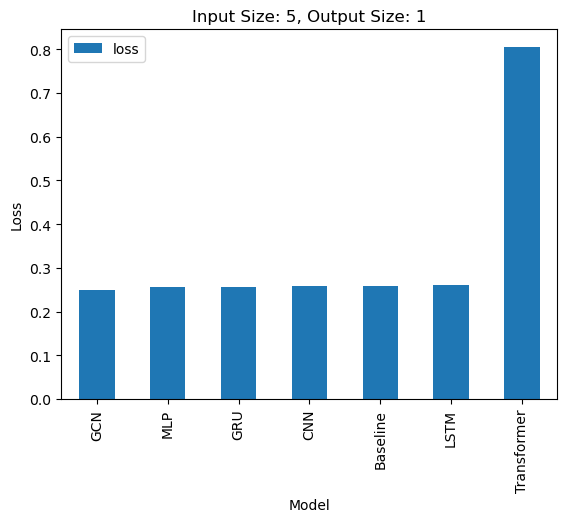

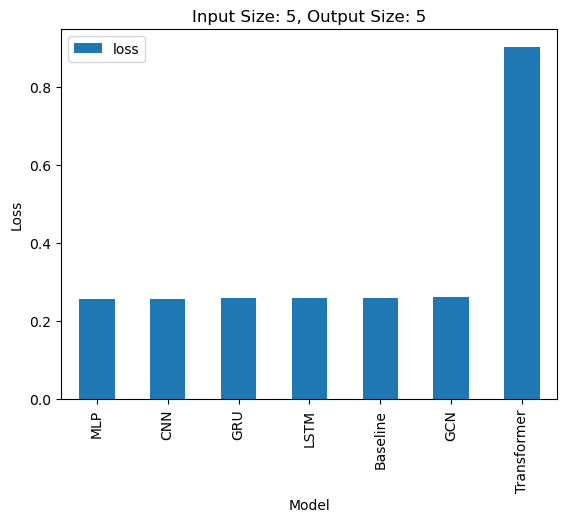

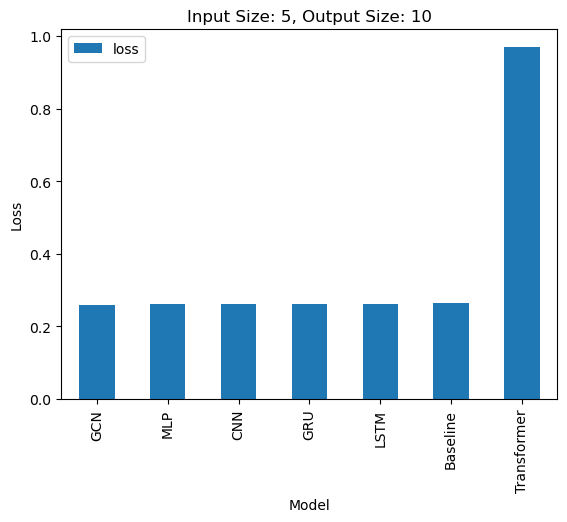

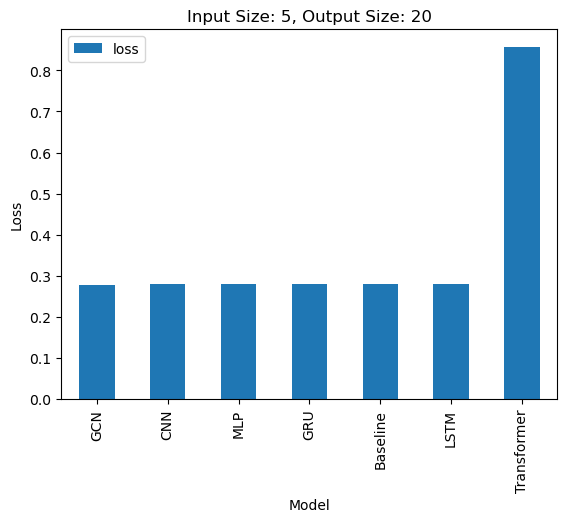

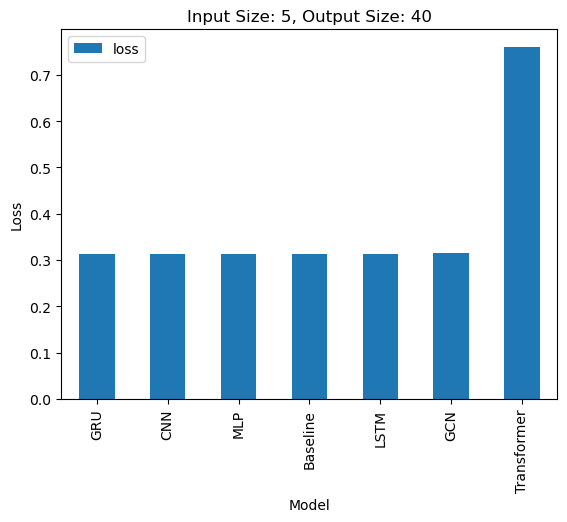

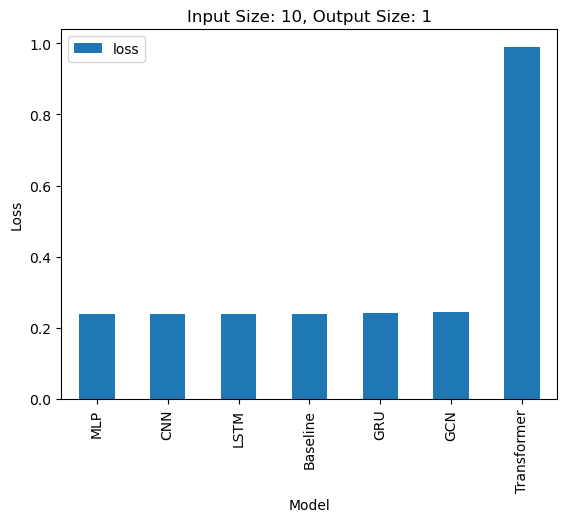

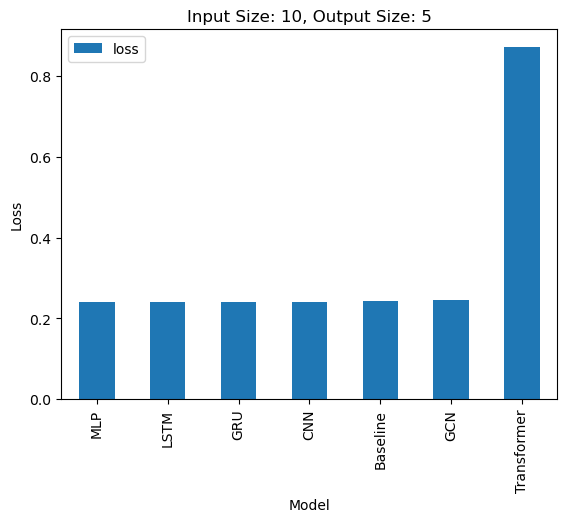

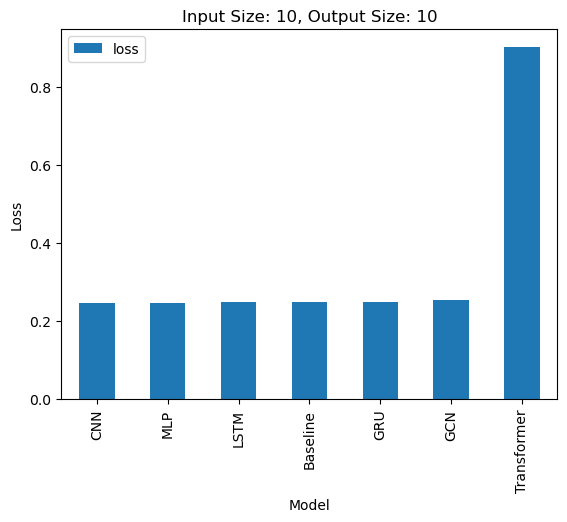

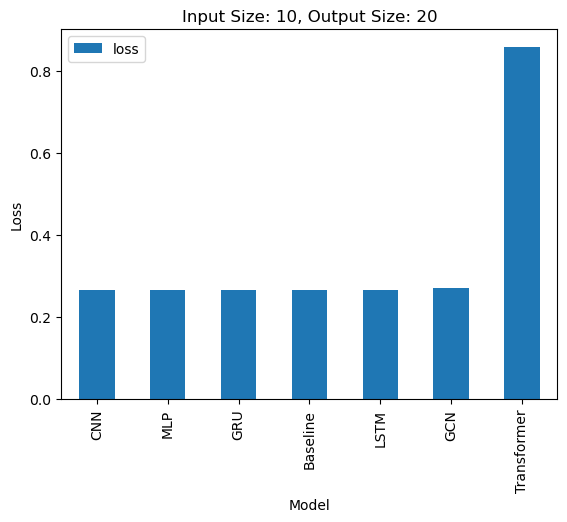

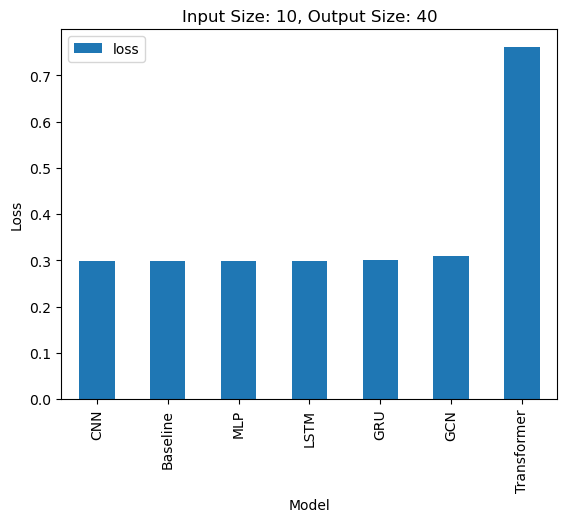

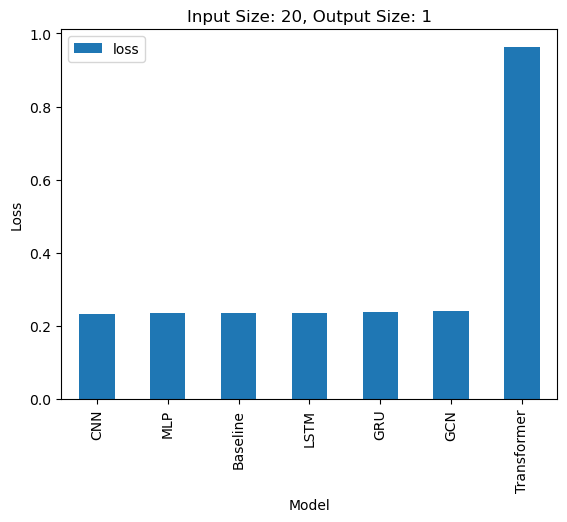

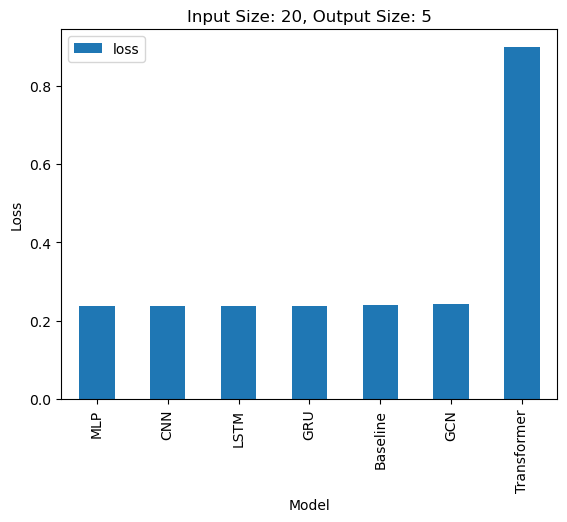

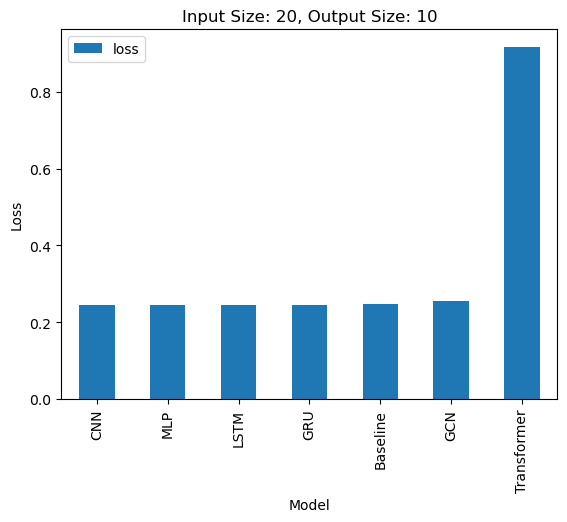

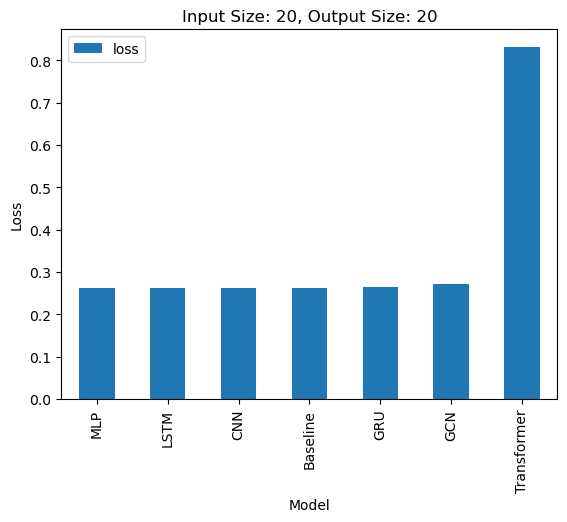

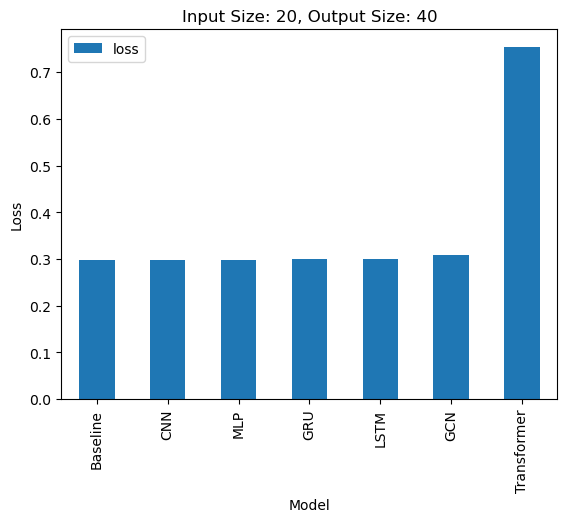

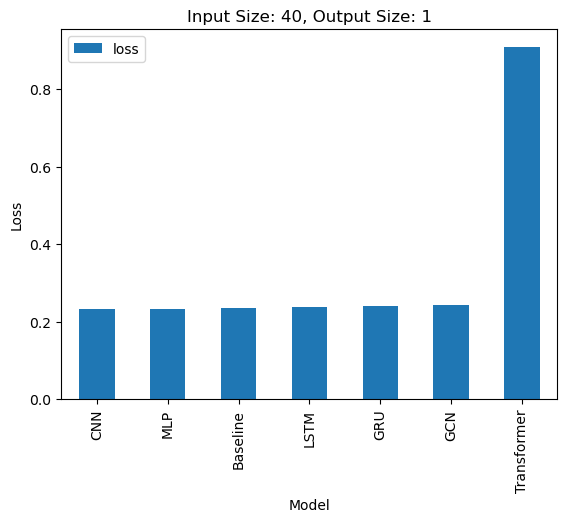

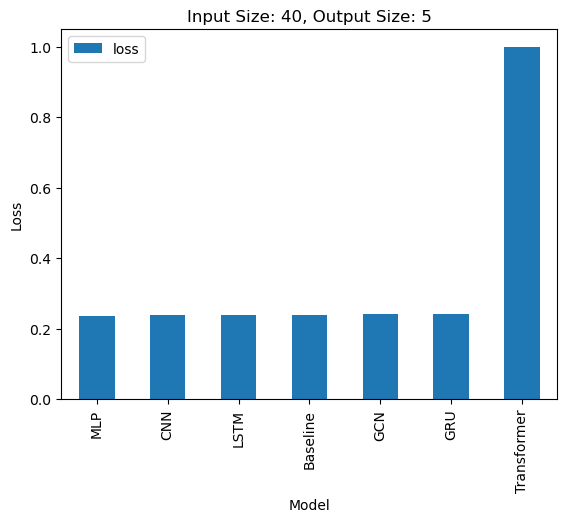

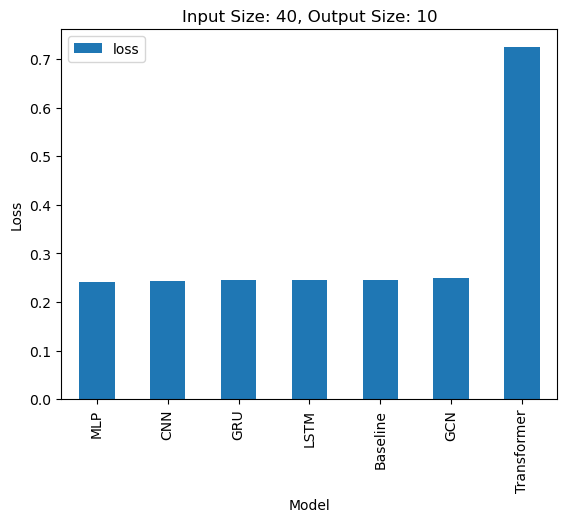

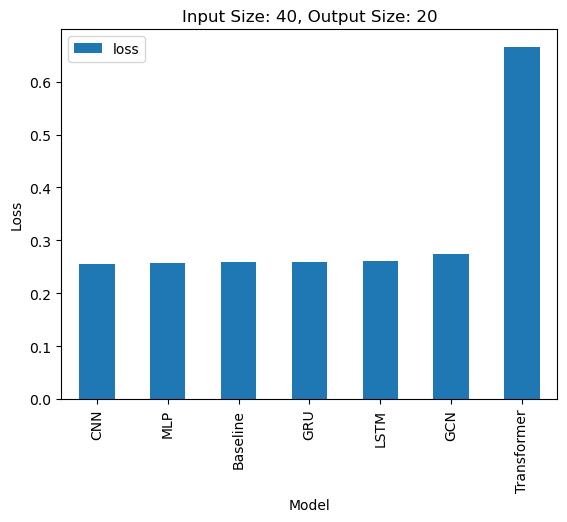

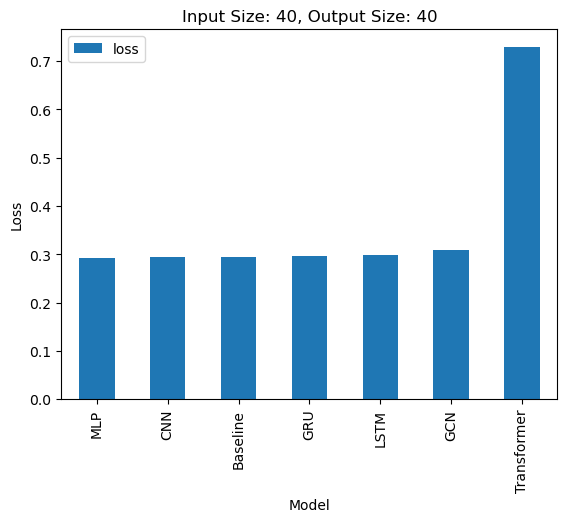

In [79]:
for (input_size, output_size), group in grouped1:
    # Generate a histogram of the 'loss' column
    group.plot(x='model', y='loss', kind='bar', title=f'Input Size: {input_size}, Output Size: {output_size}')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.show()

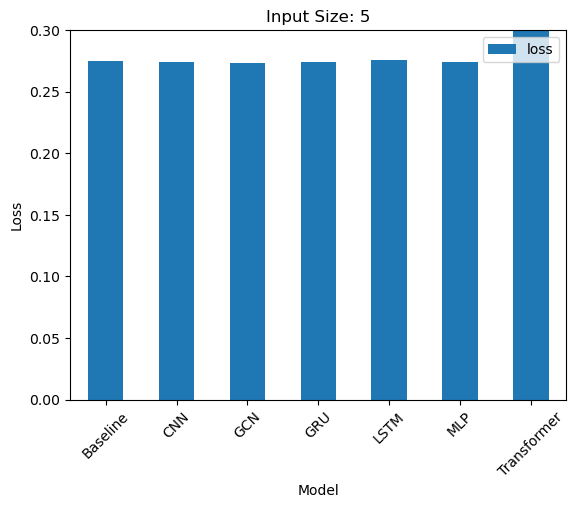

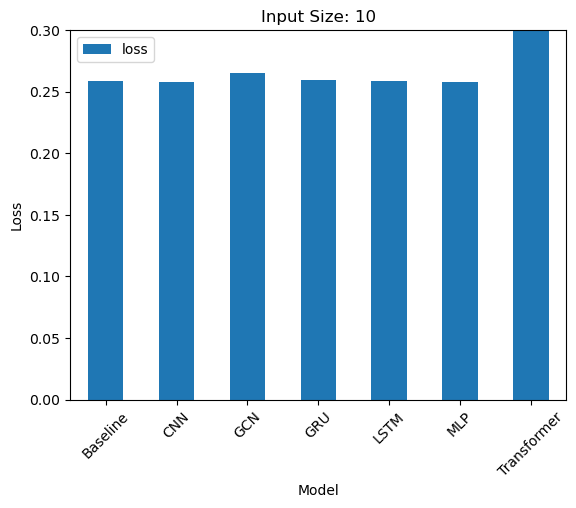

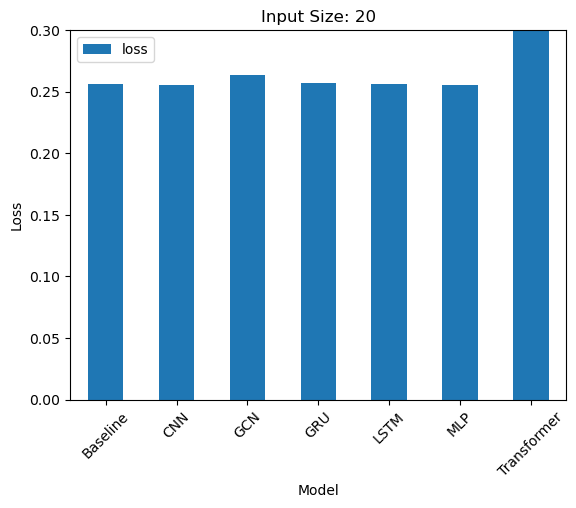

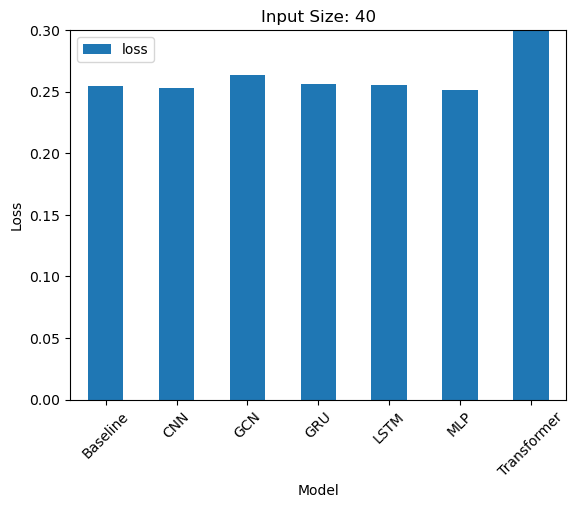

In [93]:
for input_size, group in grouped2.groupby('input_size'):
    group.plot(x='model', y='loss', kind='bar', title=f'Input Size: {input_size}')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.ylim(0,0.3)
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.show()

In [89]:
for input_size, group in grouped2.groupby('input_size'):
    group.plot(x='model', y='loss', kind='bar', title=f'Input Size: {input_size}')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.show()

input_size  model      
5           Baseline       0.275004
            CNN            0.273997
            GCN            0.273136
            GRU            0.274119
            LSTM           0.275373
            MLP            0.273695
            Transformer    0.858458
10          Baseline       0.258837
            CNN            0.258137
            GCN            0.265015
            GRU            0.259411
            LSTM           0.258730
            MLP            0.258086
            Transformer    0.876386
20          Baseline       0.256516
            CNN            0.255260
            GCN            0.263682
            GRU            0.257252
            LSTM           0.256423
            MLP            0.255254
            Transformer    0.872299
40          Baseline       0.254643
            CNN            0.252651
            GCN            0.263241
            GRU            0.256645
            LSTM           0.255662
            MLP            0.251740
    

C:\Users\lefti\AppData\Local\Temp\ipykernel_25752\3446734709.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab10", len(grouped2['model'].unique()))  # Use a color map


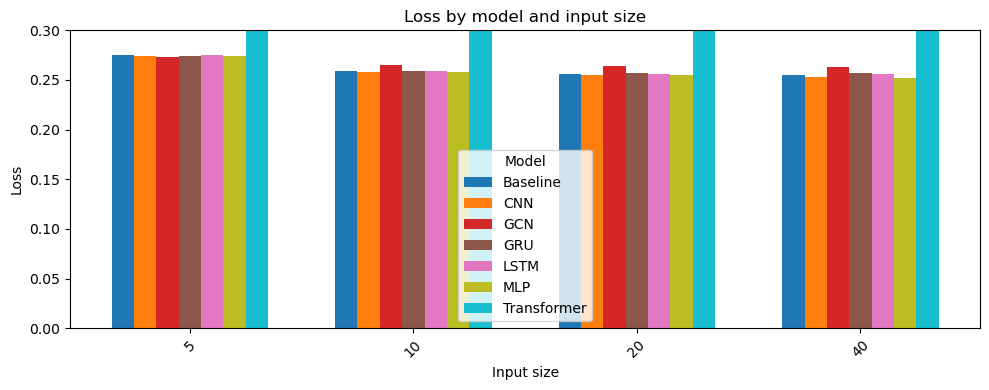

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


# Create a list of unique input sizes
input_sizes = grouped2['input_size'].unique()

# Define the position for each group of bars
bar_width = 0.1  # Bar width
index = np.arange(len(input_sizes))  # X positions for the groups of bars

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Get a color map
colors = cm.get_cmap("tab10", len(grouped2['model'].unique()))  # Use a color map

# Iterate over each input size group and plot the bars
for i, input_size in enumerate(input_sizes):
    group = grouped2[grouped2['input_size'] == input_size]
    
    # Assign colors based on the model
    for j, (model, loss) in enumerate(zip(group['model'], group['loss'])):
        ax.bar(index[i] + j * bar_width, loss, width=bar_width, 
               label=model if i == 0 else "", color=colors(j))

# Set the x-axis labels
ax.set_xticks(index + bar_width * (len(grouped2['model'].unique()) / 2 - 0.5))
ax.set_xticklabels(input_sizes)

# Add labels and title
ax.set_xlabel('Input size')
ax.set_ylabel('Loss')
ax.set_title('Loss by model and input size')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.ylim(0,0.3)

# Show the legend and plot
plt.legend(title="Model")
plt.tight_layout()
plt.show()


C:\Users\lefti\AppData\Local\Temp\ipykernel_25752\2193176785.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab10", len(grouped3['model'].unique()))  # Use a color map


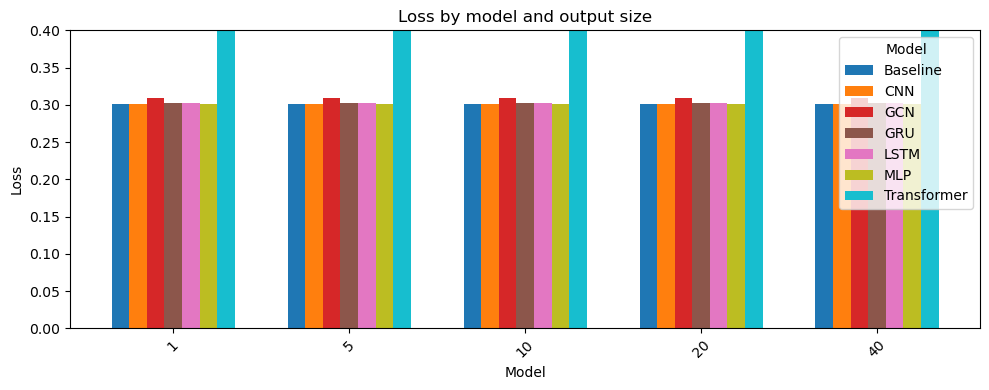

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


# Create a list of unique input sizes
input_sizes = grouped3['output_size'].unique()

# Define the position for each group of bars
bar_width = 0.1  # Bar width
index = np.arange(len(input_sizes))  # X positions for the groups of bars

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Get a color map
colors = cm.get_cmap("tab10", len(grouped3['model'].unique()))  # Use a color map

# Iterate over each input size group and plot the bars
for i, input_size in enumerate(input_sizes):
    group = grouped3[grouped3['output_size'] == output_size]
    
    # Assign colors based on the model
    for j, (model, loss) in enumerate(zip(group['model'], group['loss'])):
        ax.bar(index[i] + j * bar_width, loss, width=bar_width, 
               label=model if i == 0 else "", color=colors(j))

# Set the x-axis labels
ax.set_xticks(index + bar_width * (len(grouped3['model'].unique()) / 2 - 0.5))
ax.set_xticklabels(input_sizes)

# Add labels and title
ax.set_xlabel('Output size')
ax.set_ylabel('Loss')
ax.set_title('Loss by model and output size')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.ylim(0,0.4)

# Show the legend and plot
plt.legend(title="Model")
plt.tight_layout()
plt.show()


In [111]:
tester = analyze_df[(analyze_df['output_size']==40) &((analyze_df['input_size']==40) | (analyze_df['input_size'] == 5))]

tester

,model,input_size,output_size,loss,predictions
139,MLP,40,40,0.291761,"[[1.319683313369751, 1.302299976348877, 1.2846..."
79,CNN,40,40,0.293722,"[[1.2632791996002197, 1.2734112739562988, 1.29..."
19,Baseline,40,40,0.294252,"[[1.338936448097229, 1.3243813514709473, 1.318..."
119,GRU,40,40,0.296346,"[[1.0790663957595825, 1.018661618232727, 1.079..."
99,LSTM,40,40,0.297553,"[[0.8065300583839417, 0.9175516963005066, 0.78..."
39,GCN,40,40,0.308099,"[[1.4146206378936768, 1.4234572649002075, 1.47..."
104,GRU,5,40,0.312228,"[[0.9893449544906616, 1.0597457885742188, 1.01..."
64,CNN,5,40,0.312536,"[[1.088546872138977, 1.102683186531067, 1.1021..."
124,MLP,5,40,0.313059,"[[1.1277375221252441, 1.1274983882904053, 1.12..."
4,Baseline,5,40,0.313093,"[[1.0540786981582642, 1.0586038827896118, 1.04..."


In [141]:
tester['last_pred']=tester['predictions'].apply(lambda x: ast.literal_eval(x)[-1] if isinstance(ast.literal_eval(x), list) else None)

KeyboardInterrupt: 

In [147]:
tester['time_step'] = tester['last_pred'].apply(lambda x: list(range(1, len(x) + 1)) if isinstance(x, list) else [])

# Step 2: Explode both the 'last_pred' and 'time_step' columns
tester_exploded = tester.explode(['last_pred', 'time_step'])

# Step 3: Now, plot the data

C:\Users\lefti\AppData\Local\Temp\ipykernel_25752\1750229077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tester['time_step'] = tester['last_pred'].apply(lambda x: list(range(1, len(x) + 1)) if isinstance(x, list) else [])


<Axes: xlabel='time_step', ylabel='last_pred'>

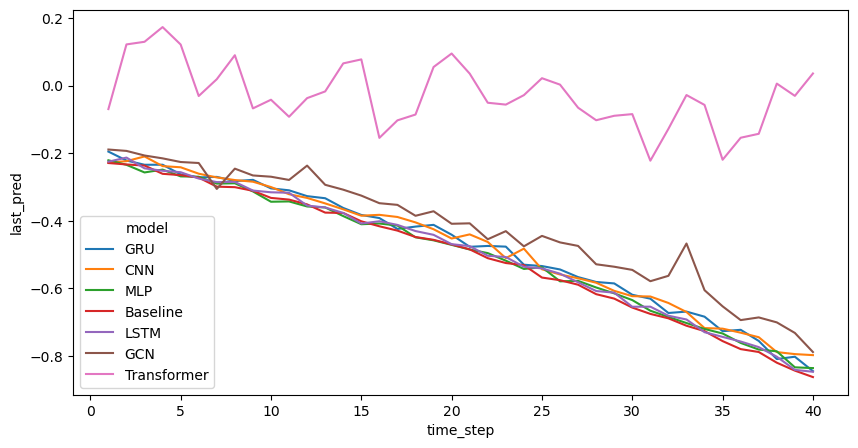

In [148]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tester_exploded[tester_exploded['input_size'] == 5], x='time_step', y='last_pred', hue='model')

In [153]:
df_answers_plot = df_answers[(df_answers['output_size']==40) &((df_answers['input_size']==40) | (df_answers['input_size'] == 5))]

df_answers_plot['last_pred']=df_answers_plot['ys'].apply(lambda x: ast.literal_eval(x)[-1] if isinstance(ast.literal_eval(x), list) else None)

C:\Users\lefti\AppData\Local\Temp\ipykernel_25752\514806783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_answers_plot['last_pred']=df_answers_plot['ys'].apply(lambda x: ast.literal_eval(x)[-1] if isinstance(ast.literal_eval(x), list) else None)


In [155]:
df_answers_plot['time_step'] = df_answers_plot['last_pred'].apply(lambda x: list(range(1, len(x) + 1)) if isinstance(x, list) else [])

# Step 2: Explode both the 'last_pred' and 'time_step' columns
df_answers_exp = df_answers_plot.explode(['last_pred', 'time_step'])

# Step 3: Now, plot the data

C:\Users\lefti\AppData\Local\Temp\ipykernel_25752\3500764710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_answers_plot['time_step'] = df_answers_plot['last_pred'].apply(lambda x: list(range(1, len(x) + 1)) if isinstance(x, list) else [])


In [156]:
df_answers_exp

,input_size,output_size,xs,ys,txs,tys,sensors,last_pred,time_step
4,5,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",-0.280005,1
4,5,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",-0.234901,2
4,5,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",-0.302557,3
4,5,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",0.125931,4
4,5,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",0.148483,5
...,...,...,...,...,...,...,...,...,...
19,40,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",-0.212349,36
19,40,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",-1.723332,37
19,40,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",-1.497812,38
19,40,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.4113940000534058, 1.5692578554153442, 0.71...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0...",-1.328672,39


Text(0.5, 1.0, 'Input = 5')

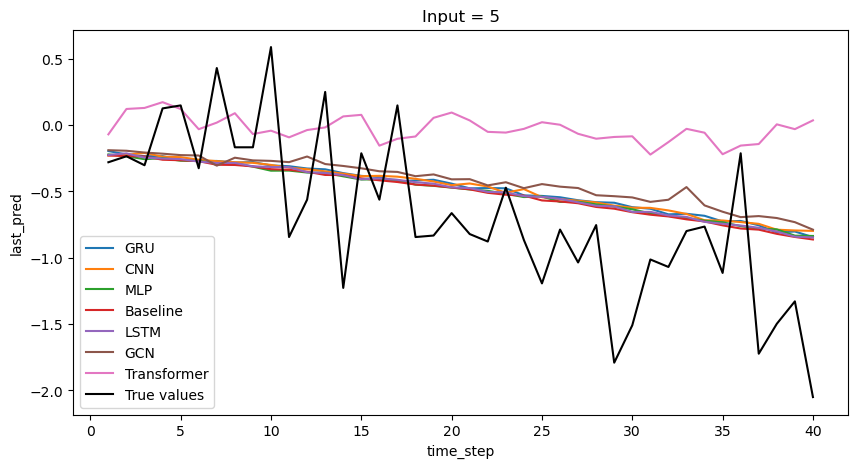

In [164]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tester_exploded[tester_exploded['input_size'] == 5], x='time_step', y='last_pred', hue='model')
sns.lineplot(data=df_answers_exp[df_answers_exp['input_size'] == 5], x='time_step', y='last_pred', color = 'black',label = 'True values', legend = True)
plt.title('Input = 5')

Text(0.5, 1.0, 'Input = 40')

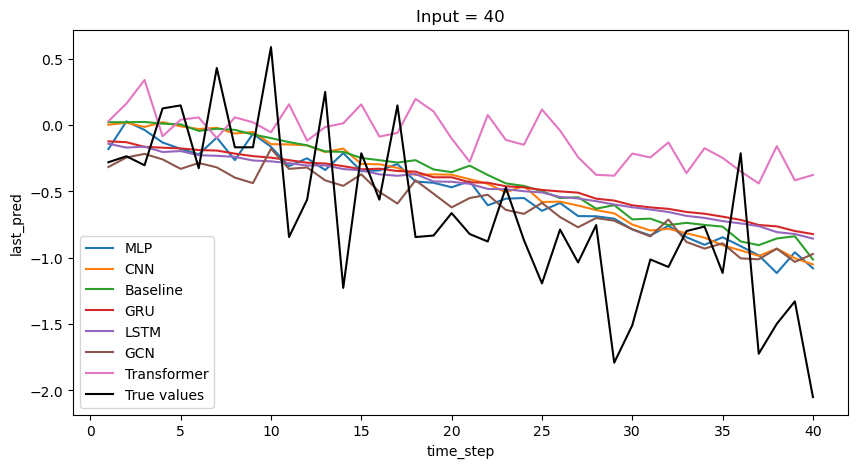

In [163]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tester_exploded[tester_exploded['input_size'] == 40], x='time_step', y='last_pred', hue='model')
sns.lineplot(data=df_answers_exp[df_answers_exp['input_size'] == 40], x='time_step', y='last_pred', color = 'black', label = 'True values', legend = True)
plt.title('Input = 40')